In [4]:
"""
* autograd: automatic gradient
* This is an implementation of backproagation: Compute the gradient of a loss function in respect to the weight.
"""
import math
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def f(x):
    return 3*x**2 - 4*x + 5

In [8]:
f(3.0)

20.0

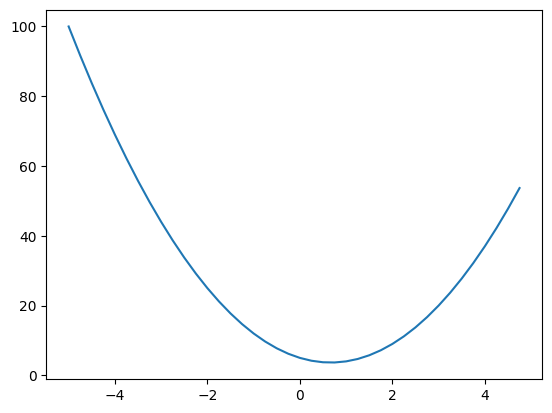

In [11]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [15]:
h = 0.001
x = 3.0
f(x+h)

20.014003000000002

In [19]:
# From the limit definition (f(x+h) - f(x))/h
h=0.000001
(f(x+h) - f(x))/h

14.000003002223593

In [21]:
a=2.0
b=-3.0
c=10.0
d=a*b+c
print(d)

4.0


In [25]:
h=0.0001
a=2.0
b=-3.0
c=10.0
d1=a*b+c
c+=h
d2=a*b+c
print(f'd1={d1}')
print(f'd2={d2}')
print(f'slope is {(d2-d1)/h}')
print(d)

d1=4.0
d2=4.0001
slope is 0.9999999999976694
4.0


In [111]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.label=label
        self.grad = 0
        self._prev = set(_children)
        self._op = _op

    def __repr__(self):
        return f"Value(data={self.data}, children={self._prev}, operator={self._op}, label={self.label})"

    def __add__(self,other):
        out = Value(self.data + other.data, (other,self), '+')
        return out

    def __mul__(self,other):
        out = Value(self.data*other.data, (other,self) , '*')
        return out

In [119]:
a = Value(3.0,label='a')
b = Value(5.0,label='b')
a

Value(data=3.0, children=set(), operator=, label=a)

In [120]:
a

Value(data=3.0, children=set(), operator=, label=a)

In [121]:
a+b

Value(data=8.0, children={Value(data=3.0, children=set(), operator=, label=a), Value(data=5.0, children=set(), operator=, label=b)}, operator=+, label=)

In [122]:
a*b

Value(data=15.0, children={Value(data=3.0, children=set(), operator=, label=a), Value(data=5.0, children=set(), operator=, label=b)}, operator=*, label=)

In [156]:
c = Value(4.0,label='c')
e= a*b; e.label='e'
d= e+c; d.label='d'
f  = Value(-2.0, label='f')
L = d*f; L.label='L'

In [157]:
from graphviz import Digraph

# DFS
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            try:
                for child in v._prev:
                    edges.add((child,v))
                    build(child)
            except Exception as e:
                print(f'Failed with {v}')

    build(root)
    # print(nodes,edges)
    return nodes,edges


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid,label="%s | data  %.4f" % (n.label,n.data),shape='record')
        if n._op:
            dot.node(name = uid + n._op,label=n._op)
            dot.edge(uid+n._op, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op)

    return dot

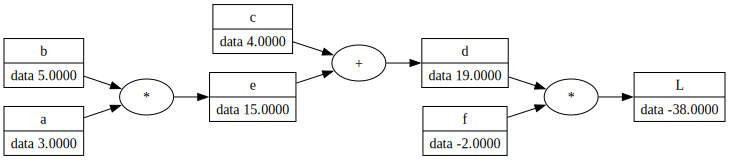

In [158]:
draw_dot(L)